# 1. Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 2. Data Collection and Processing

In [ ]:
# Loading our CSV data into a Pandas DataFrame
df = pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
# Lets look at the first 5 rows of our data
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Printing the last five rows
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# Checking the shape of our data
df.shape

(2290, 6)

In [ ]:
# Getting some basic information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking the number of missing values
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# Checking the statistical measures of our data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# 3. Correlation

We have two types of correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
# Converting the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Defining correlation
correlation = df.corr(numeric_only=True)

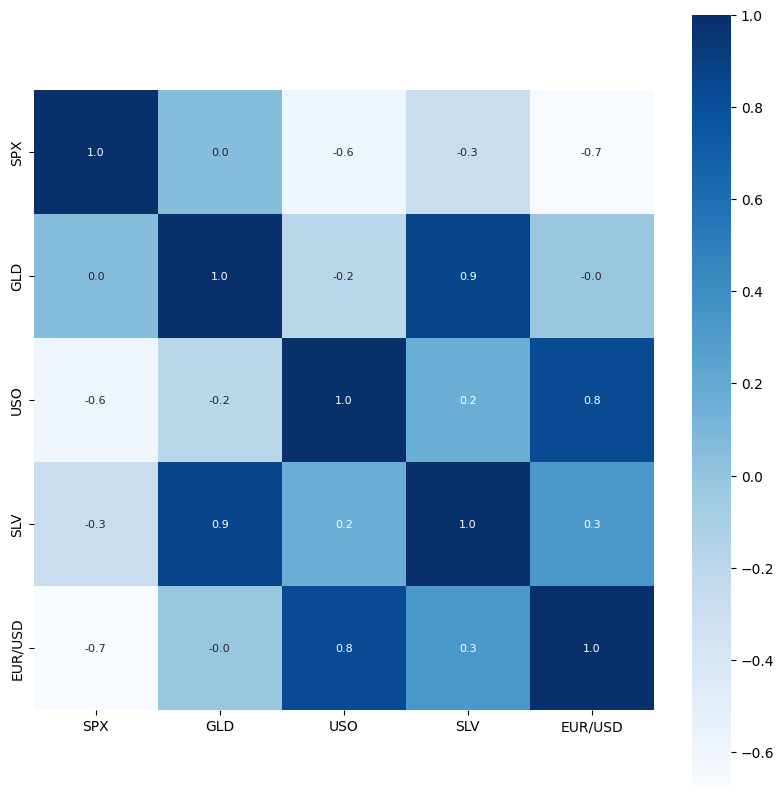

In [ ]:
# Constructing a heatmap to understand the correlation of our data
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues');

In [ ]:
# Checking the correlation values of gld
correlation['GLD']

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


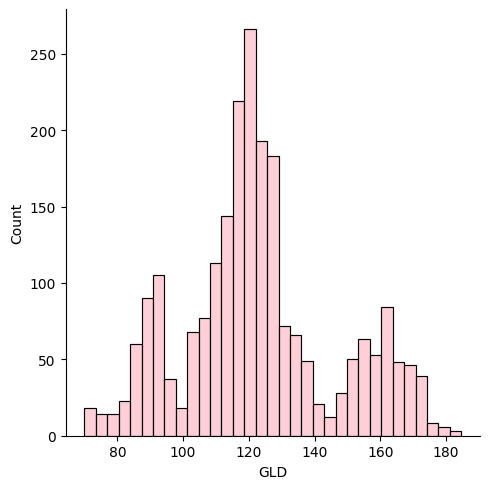

In [ ]:
# Checking the distribution of the GLD price
sns.displot(df['GLD'], color='Pink');

# 4. Splitting tehe data into features and targets

In [ ]:
X = df.drop(['Date', 'GLD'], axis = 1)
Y = df['GLD']

In [ ]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


# 5. Splitting into Training and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# 6. Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Training our model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# 7. Model Evaluation

In [ ]:
# Predicting on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.45619909  82.00559969 116.04390045 127.61720067 120.81560124
 154.53949706 150.28079872 126.10399997 117.44859874 126.00720076
 116.64360101 172.22020095 142.02719957 167.85229815 115.21320021
 117.4404007  139.38440244 170.04600077 159.36850261 157.96909933
 155.01310003 125.42630014 176.99479893 156.67530398 125.20330014
  93.66949943  77.77740011 120.69510011 119.15229943 167.45319932
  88.3195001  125.50559996  91.25170083 117.58680051 121.13749944
 136.35740058 115.46740125 114.82860069 147.36109987 107.02590105
 104.42730251  87.29829808 126.60850083 118.0109995  153.28569904
 119.66760003 108.3537     108.13169816  93.23290033 126.95139846
  75.33340016 113.62749899 121.23109994 111.24029901 118.87589863
 120.51159947 158.75009942 167.95580093 146.81189662  85.92759858
  94.31790027  86.88709917  90.49590006 119.09150061 126.44230056
 127.51109989 169.59640066 122.36509905 117.41339911  98.45050019
 167.77090154 143.05329795 132.15430314 121.32940237 120.29119946
 119.83160

In [ ]:
# R squared error calculation
from sklearn import metrics
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f'R squared error: {error_score*100:.2f}%')

R squared error: 98.91%


# 8. Compare the actual values and predicted values in plot

In [ ]:
# Convert Y_test (which might be a NumPy array or Pandas Series) into a standard Python list
# for easier manipulation or compatibility with certain functions
Y_test = list(Y_test)

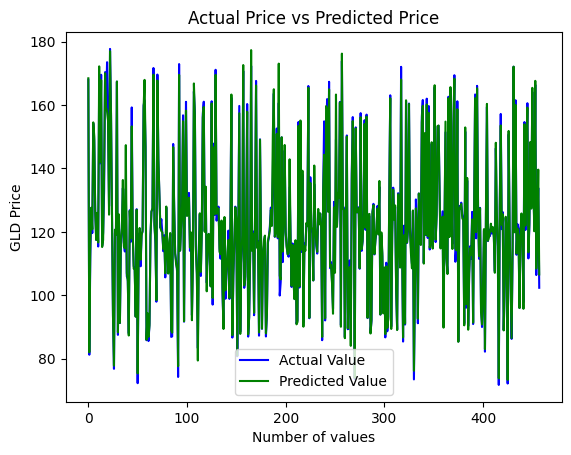

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

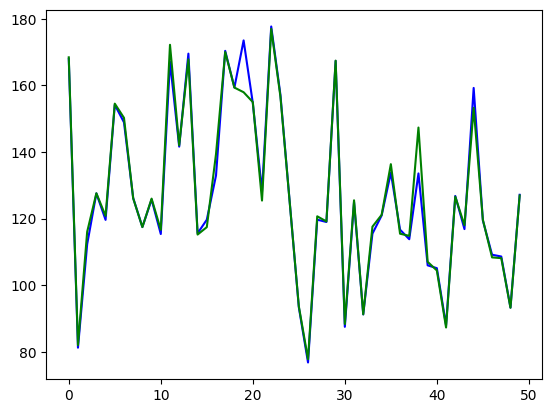

In [ ]:
plt.plot(Y_test[:50], color='blue', label='Actual Value')
plt.plot(test_data_prediction[:50], color='green', label='Predicted Value');